In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
def draw(df, by, y):
    x = df.groupby(by=by).count()
    plt.pie(x[y], labels=x.index,  autopct='%.1f%%')
    plt.title('Соотношение коментариев')
    print(x[y])

## VK

In [4]:
vk1 = pd.read_csv('datasets/ru_vk/rusentiment_random_posts.csv')
vk2 = pd.read_csv('datasets/ru_vk/rusentiment_preselected_posts.csv')
vk3 = pd.read_csv('datasets/ru_vk/rusentiment_test.csv')
vk1.shape, vk2.shape, vk3.shape

((21268, 2), (6950, 2), (2967, 2))

In [29]:
vk_full = pd.concat([vk1, vk2, vk3])
vk_full

,label,text
0,negative,"А попа подозревала давно,что ты с кавказа..пер..."
1,speech,З прошедшим Днем Ангела))))))))
2,skip,Два дня до отлёта с острова!!!!!!!
3,negative,"Блин, почему эта жизнь столь не справедлива (((("
4,skip,где еще встречать свой день рождения как не на...
...,...,...
2962,neutral,Коллективно жмём F13! И наблюдаем за результатом!
2963,neutral,ану ка быстро цоя добавь!
2964,skip,Ты одна половинка - я вторая половинка...... А...
2965,positive,Люблю кису)))


In [30]:
vk_full = vk_full.dropna().drop_duplicates()
vk_full.shape

(31092, 2)

label
negative     3911
neutral     12678
positive     6641
skip         4435
speech       3427
Name: text, dtype: int64


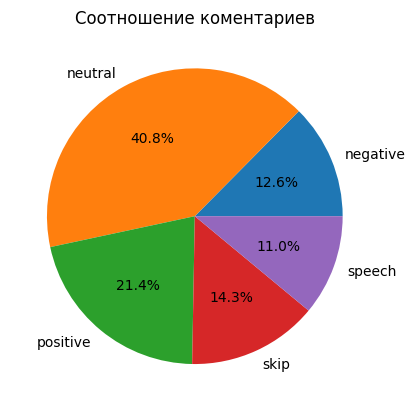

In [32]:
draw(vk_full, 'label', 'text')

## Twitter

In [292]:
t1 = pd.read_csv('datasets/ru_tweets/negative.csv', delimiter=';')
t2 = pd.read_csv('datasets/ru_tweets/positive.csv', delimiter=';')

t1.columns.values[3] = 'text'
t1.columns.values[4] = 'label'
t2.columns.values[3] = 'text'
t2.columns.values[4] = 'label'

t1.shape, t2.shape

((111922, 12), (114910, 12))

In [48]:
t2

,408906692374446080,1386325927,pleease_shut_up,text,label,0,0.1,0.2,7569,62,61,0.3
0,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
1,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
2,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
3,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1
4,408906761769598976,1386325943,JustinB94262583,ну любишь или нет? — Я не знаю кто ты бля:D ht...,1,0,0,0,40,6,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...
114905,411368729235054592,1386912922,diminlisenok,"Спала в родительском доме, на своей кровати......",1,0,0,0,1497,56,34,2
114906,411368729424187392,1386912922,qilepocagotu,RT @jebesilofyt: Эх... Мы немного решили сокра...,1,0,1,0,692,225,210,0
114907,411368796537257984,1386912938,DennyChooo,"Что происходит со мной, когда в эфире #proacti...",1,0,0,0,4905,448,193,13
114908,411368797447417856,1386912938,bedowabymir,"""Любимая,я подарю тебе эту звезду..."" Имя како...",1,0,0,0,989,254,251,0


In [49]:
t1.columns, t2.columns

(Index(['408906762813579264', '1386325944', 'dugarchikbellko', 'text', 'label',
        '0', '0.1', '0.2', '8064', '111', '94', '2'],
       dtype='object'),
 Index(['408906692374446080', '1386325927', 'pleease_shut_up', 'text', 'label',
        '0', '0.1', '0.2', '7569', '62', '61', '0.3'],
       dtype='object'))

In [293]:
t1 = t1[['text', 'label']]
t2 = t2[['text', 'label']]
t_full = pd.concat([t1, t2])
t_full = t_full.dropna().drop_duplicates()
t_full.shape

(217438, 2)

In [294]:
def change_label(row):
    label = row['label']
    if label == 1:
        row['label'] = 'positive'
    else:
        row['label'] = 'negative'
    
    return row


t_full = t_full.apply(change_label, axis=1)

label
negative    107043
positive    110395
Name: text, dtype: int64


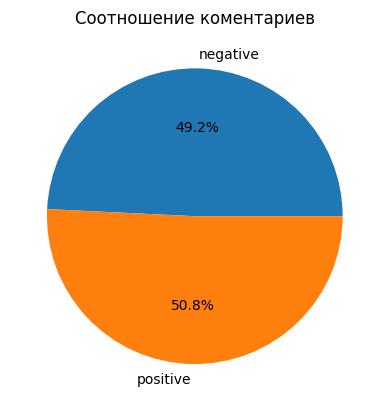

In [54]:
draw(t_full, 'label', 'text')

## Otzovik.com

In [93]:
o = pd.read_csv('datasets/otzovik.csv', index_col = 0)
o.shape

(28879, 4)

In [94]:
o = o[['text', 'score']].dropna().drop_duplicates()
o.shape

(27484, 2)

In [95]:
o

,text,score
0,С этой студией встречаюсь уже в третий раз.Сту...,5.0
1,Хочу оставить отзыв хоть я ещё не закончила уч...,5.0
2,"Во первых тебя встречают, говорят всем здравст...",5.0
3,"Этот курс просто спасение для тех, кто мечтает...",5.0
4,"Прохожу этот курс, и уже многое стало понятнее...",5.0
...,...,...
28874,"Здравствуйте! Я учился в этом университете, пр...",5.0
28875,"Закончила данный институт в 2018 году, на инже...",5.0
28876,"Учусь я в нем уже 5 лет, а всего учиться 5,5. ...",5.0
28877,В КузГТУ учусь уже 4 года. Поначалу было конеч...,5.0


score
1.0     5197
2.0     1491
3.0     1481
4.0     2772
5.0    16543
Name: text, dtype: int64


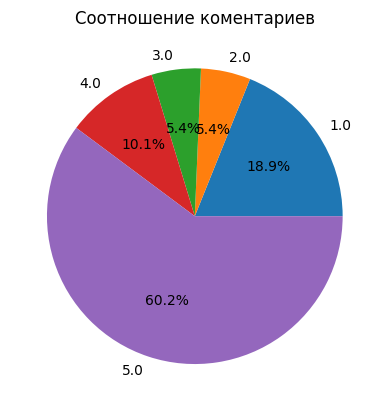

In [96]:
draw(o, 'score', 'text')

## General diagram

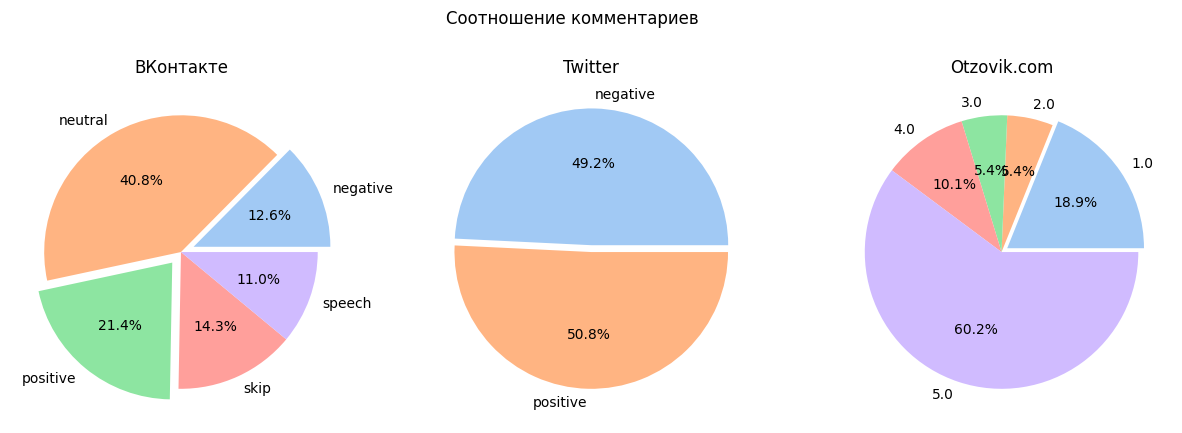

In [97]:
fig, ax = plt.subplots(1, 3)
fig.suptitle('Соотношение комментариев')
fig.set_size_inches(15, 5)

x = vk_full.groupby(by='label').count()
ax[0].pie(x['text'], labels = x.index, autopct='%.1f%%', 
          colors = sns.color_palette("pastel"), explode=[0.1, 0, 0.1, 0, 0])
ax[0].set_title('ВКонтакте')

x = t_full.groupby(by='label').count()
ax[1].pie(x['text'], labels = x.index, autopct='%.1f%%', 
          colors = sns.color_palette("pastel"), explode=[0.05, 0])
ax[1].set_title('Twitter')


x = o.groupby(by='score').count()
ax[2].pie(x['text'], labels = x.index, autopct='%.1f%%', 
          colors = sns.color_palette("pastel"), explode=[0.05, 0, 0, 0, 0])
ax[2].set_title('Otzovik.com')

fig.savefig('img/comment_ratio', dpi=90)

In [90]:
def get_text_len(df):
    x = df['text'].map(lambda x: len(str(x).split(' ')))
    print('Min:', np.min(x))
    print('Max:', np.max(x))
    print('Mean', np.mean(x))
    print('Median', np.median(x))

In [85]:
print('VK')
get_text_len(vk_full)

VK
Min: 1
Max: 200
Mean 12.528206612633475
Median 7.0


In [86]:
print('Twitter')
get_text_len(t_full)

Twitter
Min: 1
Max: 94
Mean 12.101858920703833
Median 11.0


In [98]:
print('Otzovik')
get_text_len(o)

Otzovik
Min: 6
Max: 5321
Mean 200.5481007131422
Median 131.0


## Merge

In [130]:
vk_part = vk_full[(vk_full['label'] == 'positive') | (vk_full['label'] == 'negative')]
vk_part.shape, vk_part.columns, vk_part.label.unique()

((10552, 2),
 Index(['label', 'text'], dtype='object'),
 array(['negative', 'positive'], dtype=object))

In [295]:
twitter_part = t_full.copy()
twitter_part.shape, twitter_part.columns, twitter_part.label.unique()

((217438, 2),
 Index(['text', 'label'], dtype='object'),
 array(['negative', 'positive'], dtype=object))

In [175]:
site_part = o[(o['score'] < 3) | (o['score'] > 3)]
site_part.shape, site_part.columns, site_part.score.unique()

((26003, 2), Index(['text', 'score'], dtype='object'), array([5., 4., 1., 2.]))

In [133]:
def merge_categories(row):
    score = row['score']
    new_score = -1

    if score in [4, 5]:
        new_score = 'positive'
    elif score in [1, 2]:
        new_score = 'negative'


    row['score'] = new_score
    return row

In [176]:
print(site_part.columns)
site_part = site_part.apply(merge_categories, axis=1)
site_part.rename(columns = {'score': 'label'}, inplace=True)
site_part.shape, site_part.columns, site_part.label.unique()

Index(['text', 'score'], dtype='object')


((26003, 2),
 Index(['text', 'label'], dtype='object'),
 array(['positive', 'negative'], dtype=object))

In [148]:
def add_sign(name):
    def for_each_row(row):
        row['from'] = name
        return row
    return for_each_row

def sign_data(df, name):
    func = add_sign(name)
    return df.apply(func, axis=1)

In [296]:
vk = sign_data(vk_part, 'vk')
twitter = sign_data(twitter_part, 'twitter')
site_part = sign_data(site_part, 'otzovik')

In [297]:
df = pd.concat([vk, twitter, site_part])
df.shape

(253993, 3)

Text(0.5, 1.0, 'Соотношение данных по источникам')

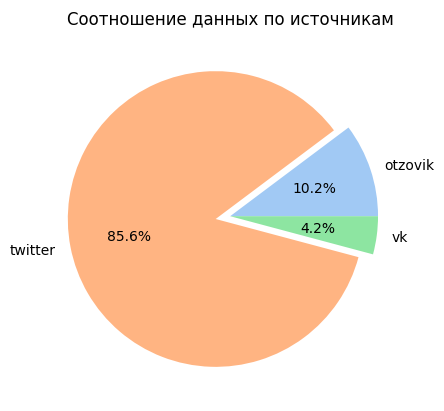

In [301]:
x = df.groupby(by='from').count()
plt.pie(x['text'], labels = x.index, autopct='%.1f%%', 
          colors = sns.color_palette("pastel"), explode=[0, 0.1, 0])
plt.title('Соотношение данных по источникам')

In [249]:
df

,label,text,from
0,negative,"А попа подозревала давно,что ты с кавказа..пер...",vk
3,negative,"Блин, почему эта жизнь столь не справедлива ((((",vk
6,positive,патамушта я крутая баба! ееее!!,vk
8,positive,урря!я дождался этой овцыы),vk
11,positive,Наша гордость !,vk
...,...,...,...
28874,positive,"Здравствуйте! Я учился в этом университете, пр...",otzovik
28875,positive,"Закончила данный институт в 2018 году, на инже...",otzovik
28876,positive,"Учусь я в нем уже 5 лет, а всего учиться 5,5. ...",otzovik
28877,positive,В КузГТУ учусь уже 4 года. Поначалу было конеч...,otzovik


In [251]:
df.to_csv('datasets/comments.csv')

from
otzovik    26003
twitter    15000
vk         10552
Name: text, dtype: int64


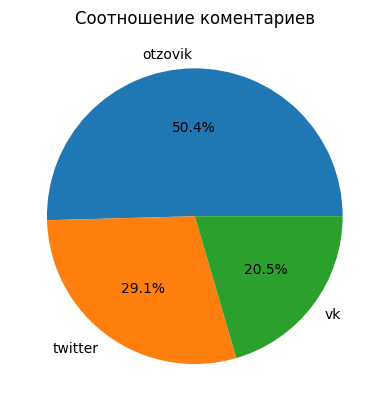

In [250]:
draw(df, 'from', 'text')

label
negative    17637
positive    33918
Name: text, dtype: int64


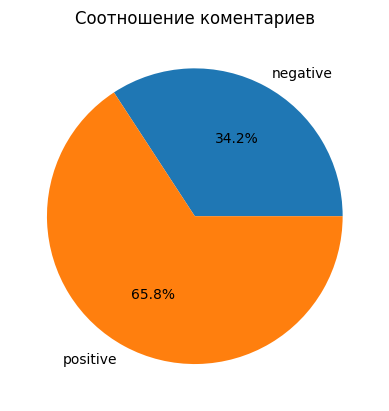

In [252]:
draw(df, 'label', 'text')

## После тематического моделирования

In [234]:
twitter = pd.read_csv('datasets/twitter.csv', index_col=0)
twitter.shape, twitter.columns # label, text, from

((15000, 3), Index(['text_y', 'label_y', 'topic'], dtype='object'))

In [235]:
twitter.rename(columns={'text_y': 'text', 'label_y': 'label'}, inplace=True)
twitter = twitter.drop(['topic'], axis=1)

In [236]:
twitter = sign_data(twitter, 'twitter')

In [243]:
twitter['label'] = twitter['label'].map(lambda x: 'negative' if x == -1 else 'positive')

In [247]:
len(twitter[twitter['label'] == 'positive']), len(twitter)

(7962, 15000)

# Отделение тестовой выборки

In [254]:
6000 * 0.2

1200.0

In [255]:
df

,label,text,from
0,negative,"А попа подозревала давно,что ты с кавказа..пер...",vk
3,negative,"Блин, почему эта жизнь столь не справедлива ((((",vk
6,positive,патамушта я крутая баба! ееее!!,vk
8,positive,урря!я дождался этой овцыы),vk
11,positive,Наша гордость !,vk
...,...,...,...
28874,positive,"Здравствуйте! Я учился в этом университете, пр...",otzovik
28875,positive,"Закончила данный институт в 2018 году, на инже...",otzovik
28876,positive,"Учусь я в нем уже 5 лет, а всего учиться 5,5. ...",otzovik
28877,positive,В КузГТУ учусь уже 4 года. Поначалу было конеч...,otzovik


In [259]:
len(df[(df['from']=='vk') & (df['label']=='negative')])

3911

In [263]:
len(df) * 0.2

10311.0

In [267]:
df[(df['from']=='vk') & (df['label']=='negative')].sample(frac=1)

,label,text,from
13288,negative,ХВАТИТ ИГНОРИТЬ!,vk
5367,negative,Мне одному хотелось в момент объявления назван...,vk
19675,negative,Ненавижу когда друзья(Братья) которых я считал...,vk
17292,negative,"ПОЛИТРЭШ СРЫВАЕТ ПОКРОВЫ! КАРАУЛ, ФАЛЬСИФИКАЦИ...",vk
10859,negative,завтра контрольная по алгебре\nск всё мне ппц!,vk
...,...,...,...
363,negative,- это сделали не люди.,vk
20399,negative,А Мавроди не успокоится. Очень примечательно. ...,vk
7566,negative,"мои одноклассники такие оригинальные, что шутк...",vk
17431,negative,"Скажите мне, пожалуйста, \nСтало ли свободнее ...",vk


In [268]:
def get_mixed_data(df, from_):
    df = df[df['from']== from_]
    negative = df[df['label']=='negative'].sample(frac=1)
    positive = df[df['label']=='positive'].sample(frac=1)
    return positive, negative

In [271]:
amount_of_samples = 1000

train, test = None, None

for i in ['vk', 'twitter', 'otzovik']:
    positive, negative = get_mixed_data(df, i)
    train = pd.concat([train, positive[amount_of_samples:], negative[amount_of_samples:]])
    test = pd.concat([test, positive[:amount_of_samples], negative[:amount_of_samples]])

len(train), len(test)

(45555, 6000)

label
negative    3000
positive    3000
Name: text, dtype: int64


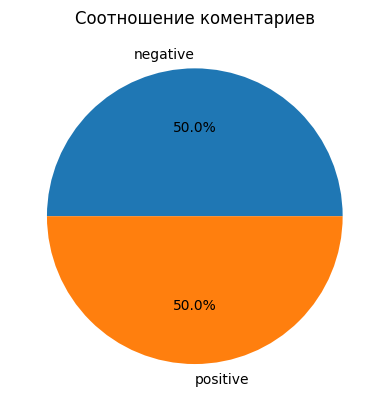

In [272]:
draw(test, 'label', 'text')

from
otzovik    2000
twitter    2000
vk         2000
Name: text, dtype: int64


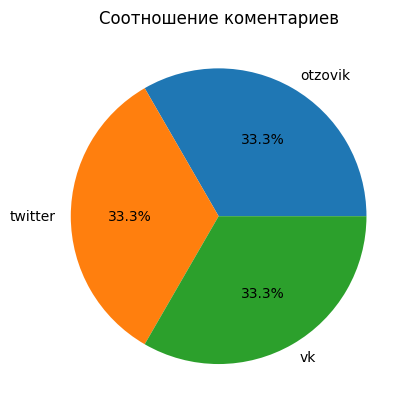

In [273]:
draw(test, 'from', 'text')

label
negative    14637
positive    30918
Name: text, dtype: int64


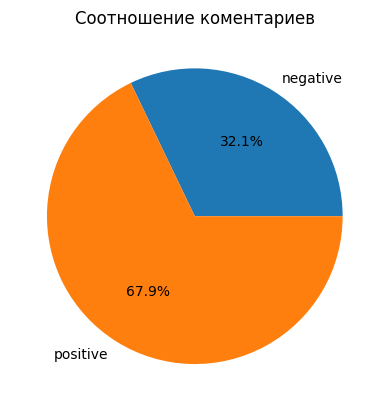

In [274]:
draw(train, 'label', 'text')

from
otzovik    24003
twitter    13000
vk          8552
Name: text, dtype: int64


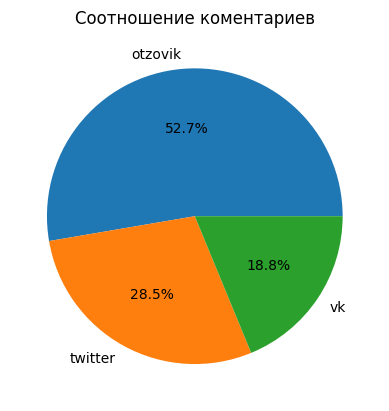

In [275]:
draw(train, 'from', 'text')

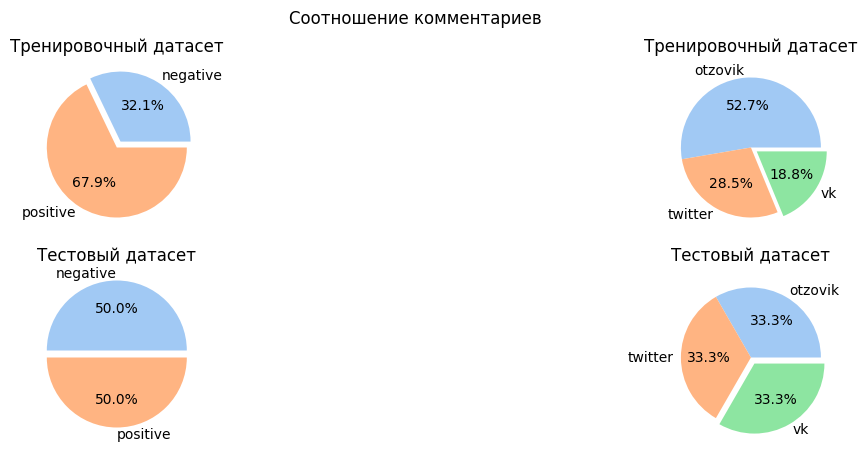

In [290]:
fig, ax = plt.subplots(2, 2)
fig.suptitle('Соотношение комментариев')
fig.set_size_inches(15, 5)

x = train.groupby(by='label').count()
ax[0][0].pie(x['text'], labels = x.index, autopct='%.1f%%', 
          colors = sns.color_palette("pastel"), explode=[0.1, 0])
ax[0][0].set_title('Тренировочный датасет')

x = train.groupby(by='from').count()
ax[0][1].pie(x['text'], labels = x.index, autopct='%.1f%%', 
          colors = sns.color_palette("pastel"), explode=[0, 0, 0.1])
ax[0][1].set_title('Тренировочный датасет')


x = test.groupby(by='label').count()
ax[1][0].pie(x['text'], labels = x.index, autopct='%.1f%%', 
          colors = sns.color_palette("pastel"), explode=[0.1, 0])
ax[1][0].set_title('Тестовый датасет')

x = test.groupby(by='from').count()
ax[1][1].pie(x['text'], labels = x.index, autopct='%.1f%%', 
          colors = sns.color_palette("pastel"), explode=[0, 0, 0.1])
ax[1][1].set_title('Тестовый датасет')

fig.savefig('img/train_test_split', dpi=90)

In [291]:
test.to_csv('datasets/test.csv')
train.to_csv('datasets/train.csv')